In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 4 hours 51 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.673 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
### Understanding the dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Listing all columns

In [12]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [13]:
###: Setting response variable

In [14]:
response = "survived"

In [15]:
###: Setting response variable to enum or categorical so we can build a classification model

In [16]:
df[response] = df[response].asfactor()

In [17]:
###: Spliting the dataset into train and test 

In [18]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [19]:
print(train_df.shape)
print(test_df.shape)

(1184, 14)
(125, 14)


In [20]:
###: Understanding Training dataset

In [21]:
train_df.describe()

Rows:1184
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,4.0,
mean,2.29476351351,,NaN,,30.0717054968,0.494087837838,0.388513513514,243498.910776,33.8993233305,,,9.46944444444,157.449541284,
maxs,3.0,,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.838692141786,,NaN,,14.5232670809,1.03528558499,0.879600589344,431981.296567,53.411678518,,,4.33026014159,98.205141134,
zeros,0,,0,,0,808,906,0,13,,,0,0,
missing,0,0,0,0,238,0,0,321,1,916,2,824,1075,506
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,135.0,"Montreal, PQ / Chesterville, ON"


In [22]:
###: Understanding Test dataset

In [23]:
test_df.describe()

Rows:125
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.8333,0.0,0.0,1601.0,0.0,,,2.0,1.0,
mean,2.296,,NaN,,28.078333,0.544,0.352,299903.12766,27.5806992,,,8.78947368421,191.333333333,
maxs,3.0,,NaN,,60.0,8.0,4.0,3101278.0,151.55,,,16.0,314.0,
sigma,0.833027901016,,NaN,,13.2626596595,1.10354268228,0.721289168445,530995.802452,31.7333058374,,,4.621675692,91.140584048,
zeros,0,,0,,0,83,96,0,4,,,0,0,
missing,0,0,0,0,25,0,0,31,0,98,0,87,113,58
0,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"
1,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050.0,0.0,A36,S,nan,nan,"Belfast, NI"


In [24]:
###: Training and test dataset - columns and rows details

In [25]:
print(train_df.shape)
print(test_df.shape)

(1184, 14)
(125, 14)


In [26]:
###: Training and Test Dataframes - columns names

In [27]:
print(train_df.col_names)
print(test_df.col_names)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']
[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [28]:
###: Settings all features for supervised machine learning

In [29]:
features = train_df.col_names
print(features)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [30]:
###: Creating a list of all features we will use for machine learning

In [31]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [32]:
###: Ignoring other features which are not needed for training

In [33]:
for feature_name in ['name', 'ticket', 'home.dest']:
    features.remove(feature_name)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [34]:
###: Understanding response variable values as historgram in Training data

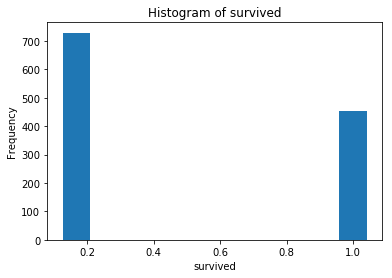

In [35]:
train_df[response].asnumeric().hist()

In [37]:
###: Importing H2O H2ORandomForestEstimator to build Random Forest Model

In [38]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [39]:
###:Building Random Forest -  Classification model with cross validation

In [40]:
drf_model_with_cv = H2ORandomForestEstimator(nfolds=5)

In [41]:
###: Training the model

In [42]:
drf_model_with_cv.train(x = features, y = response, training_frame=train_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
###: Getting model performance

In [45]:
drf_model_with_cv.model_performance(valid=True,test_data=test_df).auc()

0.9713888888888889

In [46]:
###:Building DRF Classification model with cross validation and key DRF parameters configuration

In [48]:
drf_model_cv_config = H2ORandomForestEstimator(nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345)

In [ ]:
###: Training DRF Model

In [50]:
drf_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "drf_model_with_training_and_validtion_python")

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [51]:
###: Getting DRF model performance on test data

In [52]:
drf_model_cv_config.model_performance(valid=True,test_data=test_df).auc()

0.9686111111111112

In [53]:
###: Importing H2O Grid Library

In [54]:
from h2o.grid import H2OGridSearch

In [55]:
###: Settings Random Forest grid parameters

In [56]:
drf_hyper_params = {
                "ntrees" : [10,25,50],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0]}

In [57]:
###: Setting H2O Grid Search Criteria

In [58]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [59]:
###: Finalzing the H2O Grid searching settings

In [65]:
drf_grid = H2OGridSearch(model=H2ORandomForestEstimator(
                                                    nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=drf_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_drf_grid")

In [66]:
###: Finally training H2O Grid with data 

In [67]:
drf_grid.train(x=features, y=response, training_frame=train_df)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [68]:
###: Finally getting total count of DRF models

In [69]:
len(drf_grid)

27

In [70]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [71]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [72]:
###: Applying the function to get the best model from the grid

In [73]:
best_model = find_best_model_from_grid(drf_grid, "auc")

Model ID with best R2: titnaic_drf_grid_model_23
Best AUC: 0.963409156002


In [74]:
###: Getting the best model performance on test data

In [75]:
best_model.model_performance(valid=True,test_data=test_df).auc()

0.9705555555555556

In [76]:
###: Performing predictions with one of the above model

In [81]:
drf_predictions = best_model.predict(test_df)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [83]:
drf_predictions

predict,p0,p1
1,0.596645,0.403355
1,0.614796,0.385204
1,0.623338,0.376662
1,0.450815,0.549185
1,0.583338,0.416662
1,0.0664729,0.933527
1,0.0629529,0.937047
1,0.567804,0.432196
1,0.0664729,0.933527
1,0.102953,0.897047


In [84]:
###: Understanding/Validating predictions based on prediction results historgram

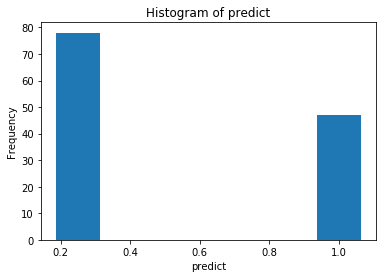

In [85]:
drf_predictions['predict'].asnumeric().hist()

In [87]:
###: Getting Scoring History

In [88]:
best_model.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-23 00:14:50,19.539 sec,0.0,NaN,NaN,NaN,NaN,NaN
1,,2017-11-23 00:14:50,19.542 sec,1.0,0.370206,3.825247,0.860178,2.333426,0.151961
2,,2017-11-23 00:14:50,19.545 sec,2.0,0.309628,1.311164,0.903889,2.602198,0.109529
3,,2017-11-23 00:14:50,19.548 sec,3.0,0.295940,0.857896,0.909702,2.602198,0.100379
4,,2017-11-23 00:14:50,19.552 sec,4.0,0.285920,0.689182,0.922115,2.602198,0.094222
5,,2017-11-23 00:14:50,19.557 sec,5.0,0.279294,0.669496,0.927958,2.602198,0.091854
6,,2017-11-23 00:14:50,19.562 sec,6.0,0.275742,0.547935,0.934272,2.602198,0.087254
7,,2017-11-23 00:14:50,19.565 sec,7.0,0.284239,0.494741,0.933378,2.602198,0.088285
8,,2017-11-23 00:14:50,19.570 sec,8.0,0.274337,0.370724,0.943465,2.602198,0.088136
9,,2017-11-23 00:14:50,19.575 sec,9.0,0.268805,0.287189,0.946427,2.602198,0.084602


In [89]:
###: Getting GBM model variable importance 

In [90]:
best_model.varimp()

[(u'boat', 4396.61083984375, 1.0, 0.6313194709458902),
 (u'cabin', 1029.3846435546875, 0.23413139826386603, 0.1478117104837654),
 (u'sex', 724.634521484375, 0.16481661622572163, 0.1040519389587144),
 (u'pclass', 205.63734436035156, 0.04677178669005412, 0.029527939628358996),
 (u'fare', 189.1609649658203, 0.0430242684323052, 0.027162058384516886),
 (u'age', 159.82949829101562, 0.0363528872836732, 0.022950285567284148),
 (u'body', 103.2724609375, 0.02348910665497294, 0.014829130386409105),
 (u'embarked', 72.89186096191406, 0.016579102317025755, 0.010466710103542482),
 (u'sibsp', 45.29018020629883, 0.010301157381468036, 0.006503321228198753),
 (u'parch', 37.44932174682617, 0.00851777041703265, 0.005377434313319608)]

In [91]:
###: Getting model variable importance PLOT

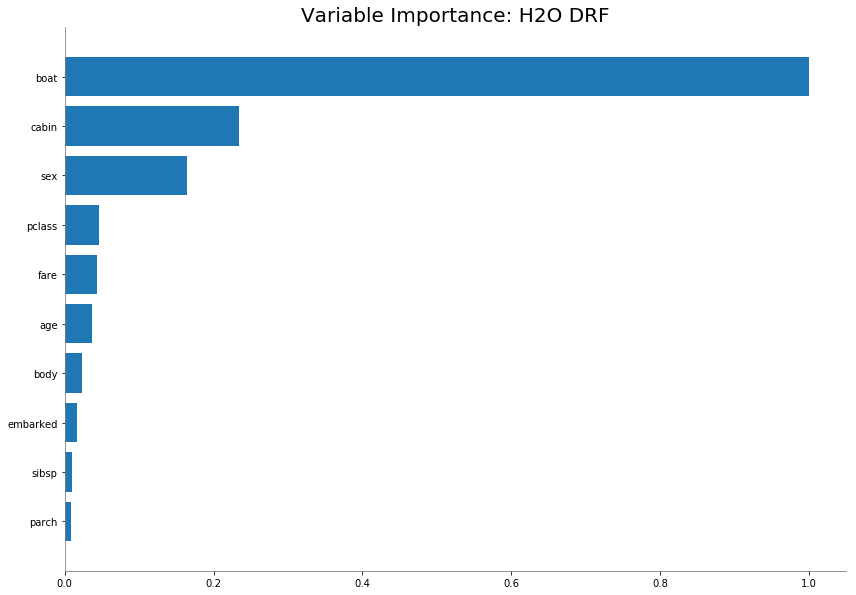

In [92]:
best_model.varimp_plot()